# Exploratory Data Analysis - Instacart Orders

**Project description**

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition. 

The dataset we've provided for you has been modified from the original. We've reduced the size of the dataset so that your calculations run faster and we’ve introduced missing and duplicate values. We were also careful to preserve the distributions of the original data when we made our changes.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. 

**Data dictionary**

There are five tables in the dataset, and you’ll need to use all of them to do your data preprocessing and EDA. Below is a data dictionary that lists the columns in each table and describes that data that hold.

instacart_orders.csv: each row corresponds to one order on the Instacart app
- 'order_id': ID number that uniquely identifies each order
- 'user_id': ID number that uniquely identifies each customer account
- 'order_number': the number of times this customer has placed an order
- 'order_dow': day of the week that the order placed (which day is 0 is uncertain)
- 'order_hour_of_day': hour of the day that the order was placed
- 'days_since_prior_order': number of days since this customer placed their previous order

products.csv: each row corresponds to a unique product that customers can buy
- 'product_id': ID number that uniquely identifies each product
- 'product_name': name of the product
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'department_id': ID number that uniquely identifies each grocery department category

order_products.csv: each row corresponds to one item placed in an order
- 'order_id': ID number that uniquely identifies each order
- 'product_id': ID number that uniquely identifies each product
- 'add_to_cart_order': the sequential order in which each item was placed in the cart
- 'reordered': 0 if the customer has never ordered this product before, 1 if they have

aisles.csv
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'aisle': name of the aisle

departments.csv
- 'department_id': ID number that uniquely identifies each grocery department category
- 'department': name of the department

**Questions**

[A] (must complete all to pass)
- Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).
- Create a plot that shows how many people place orders for each hour of the day.
- Create a plot that shows what day of the week people shop for groceries.
- Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.

[B] (must complete all to pass)
- Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days on the same plot and describe the differences that you see.
- Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)
- What are the top 20 products that are ordered most frequently (display their id and name)?

[C] (must complete at least two to pass)
- How many items do people typically buy in one order? What does the distribution look like?
- What are the top 20 items that are reordered most frequently (display their names and product IDs)?
- For each product, what proportion of its orders are reorders (create a table with columns for the product ID, product name, and reorder proportion)?
- For each customer, what proportion of their products ordered are reorders?
- What are the top 20 items that people put in their carts first (display the product IDs, product names, and number of times they were the first item added to the cart)?

### Doing some EDA in the first section to:
- Import all the modules we need
- Import the files and get a sense of the datasets
- Make sure the column names and column data types are correct

In [1]:
# Import all modules I may need here
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Increase the row display limit 
pd.set_option('display.max_rows', 500)

# Turn off grids because it doesn't align
plt.rcParams['axes.grid'] = False

In [2]:
# EDA on instacart_orders

instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
instacart_orders.info(show_counts=True)
print()
print(instacart_orders[['order_number','order_dow','order_hour_of_day','days_since_prior_order']].describe())
print()
print(instacart_orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

        order_number      order_dow  order_hour_of_day  days_since_prior_order
count  478967.000000  478967.000000      478967.000000           450148.000000
mean       17.157808       2.775058          13.446676               11.101751
std        17.704688       2.045869           4.224986                9.189975
min         1.000000       0.000000           0.000000                0.000000
25%        

**EDA on instacart_orders:**
- This is the main table that describes user behavior
- days_since_prior_order seems to be whole days but is shown as float, since it has NaN missing values
- need to figure out what to do with missing data first before converting data type
- order_dow and order_hour_of_day start at 0, but we don't know what they mean

In [3]:
# EDA on products

products = pd.read_csv('/datasets/products.csv',sep=';')
products.info(show_counts=True)
print()
print(products.isna().sum())

# Tried doing the below, says there's floats and strings so need to convert type
    # sorted(products['product_name'].unique()) # Both Floats and strings in this 
    # This reminds me that "object" can be multiple types, pandas will show dtype as "object"

# Convert the types (see cells later on for unique list): 
products['product_name'] = products['product_name'].astype('str') 
# Not converting this to category yet b/c might have implicit dupes
# products['product_id'] = products['product_id'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


**EDA on products:**
- This is a connector table - connects products to aisle and department 
- Missing data for product_name, which means the type is mixed (NaN float + string-objects)
- The product_name type had some floats mixed in (from the nulls) 
- Decided to not convert id columns to category given issues that may appear with merge and implicit duplicates

In [4]:
# EDA on order_products

order_products = pd.read_csv('/datasets/order_products.csv',sep=';')
order_products.info(show_counts=True)
print()
print(order_products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


**EDA on order_products:**
- This shows user behaviors on an order level 
- Small amount of missing data for add_to_car_order (NaNs force it to show up as a float). Need to look into it to determine what to do 

In [5]:
# EDA on aisles

aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
aisles.info(show_counts=True)
print()
sorted(aisles['aisle'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



['air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drink mixes',
 'coffee',
 'cold flu allergy',
 'condiments',
 'cookies cakes',
 'crackers',
 'cream',
 'deodorants',
 'diapers wipes',
 'digestion',
 'dish detergents',
 'dog food care',
 'doughs gelatins bake mixes',
 'dry pasta',
 'eggs',
 'energy granola bars',
 'energy sports drinks',
 'eye ear care',
 'facial care',
 'feminine care',
 'first aid',
 'food storage',
 'fresh dips tapenades',
 'fresh fruits',
 'f

**EDA on aisles:**
- This table describes the aisles
- "missing" aisle + "other aisle", what are these? 

In [6]:
# EDA on departments

departments = pd.read_csv('/datasets/departments.csv',sep=';')
departments.info(show_counts=True)
print()
print(departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18   

**EDA on Departments:**
- This table describes the departments
- What is the "missing" department?

In [7]:
# Putting this here in case we decide to drop the nans later
# What is the "missing" department (21)?
department_products =  products.merge(departments,
                                      on='department_id',
                                      how='left')

# Do all the missing departments rows have 'nan' product names? Yup. 
department_products[department_products['department_id']==21]['product_name'].value_counts()

nan    1258
Name: product_name, dtype: int64

### Next I plot some histograms to explore the questions above and get a visual sense of the data

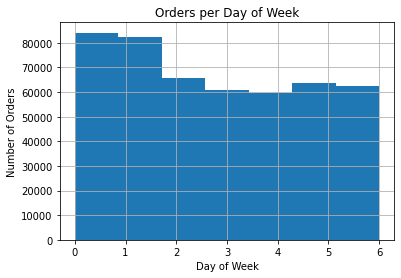

In [8]:
# Day of Week 
instacart_orders['order_dow'].hist(bins=7)
plt.title('Orders per Day of Week')
plt.ylabel('Number of Orders')
plt.xlabel('Day of Week')
plt.show()

**Observations for Day of Week data:**
- It seems like orders goes down as dow increases, still don't know what dow is 
- but since the first 2 bars are higher than the rest, good hypothesis that it's the weekend, or start of the week
    - Saturday + Sunday hypothesis: these 2 days are different from the rest, people have more time to order
    - Sunday + Monday hypothesis: people order for the coming week, sunday and monday are the "start" of the week on most calendars 
- we can cut it by order_hour_of_day per day of week to see the distribution differences 

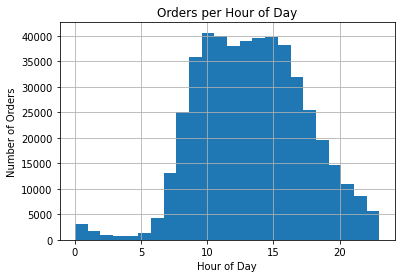

In [9]:
# Hour of Day
instacart_orders['order_hour_of_day'].hist(bins=24)
plt.title('Orders per Hour of Day')
plt.ylabel('Number of Orders')
plt.xlabel('Hour of Day')
plt.show()

**Hour of Day Observations:**
- This makes it seem like 0 is midnight for whatever location this data is from 
- This means most people place their orders during waking hours, from let's say 6/7 am to 17/18 military which is 5/6pm

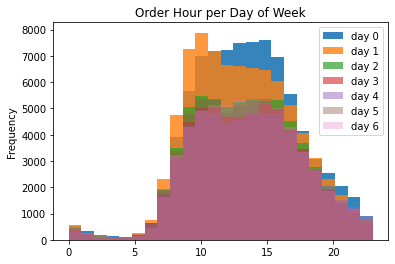

In [10]:
# Checking histograms for order_hour_of_day distribution for each order_dow to see patterns

dow_0 = instacart_orders[instacart_orders['order_dow']==0]['order_hour_of_day']
dow_1 = instacart_orders[instacart_orders['order_dow']==1]['order_hour_of_day']
dow_2 = instacart_orders[instacart_orders['order_dow']==2]['order_hour_of_day']
dow_3 = instacart_orders[instacart_orders['order_dow']==3]['order_hour_of_day']
dow_4 = instacart_orders[instacart_orders['order_dow']==4]['order_hour_of_day']
dow_5 = instacart_orders[instacart_orders['order_dow']==5]['order_hour_of_day']
dow_6 = instacart_orders[instacart_orders['order_dow']==6]['order_hour_of_day']

dow_0.plot(kind='hist',bins=24,alpha=0.9,title='Order Hour per Day of Week',ylabel='Quantity of Orders')
dow_1.plot(kind='hist',bins=24,alpha=0.8)
dow_2.plot(kind='hist',bins=24,alpha=0.7)
dow_3.plot(kind='hist',bins=24,alpha=0.6)
dow_4.plot(kind='hist',bins=24,alpha=0.5)
dow_5.plot(kind='hist',bins=24,alpha=0.4)
dow_6.plot(kind='hist',bins=24,alpha=0.3)

plt.legend(['day 0','day 1','day 2','day 3','day 4','day 5','day 6'])
plt.show()

**Hour of Day per Day of Week Observations:**
- The hour of day distribution is similar across days but there's just more frequency during peak times on 0 and 1 
- While this doesn't guarentee day 0 and 1 are weekend (sat-sun), we can form a hypothesis:
    - Day 0-1: More people have the opportunity to order during normal work/waking hours on the weekends, meal prep on weekends
    - Day 6: people don't want to spend time ordering groceries on Friday / will eat out. This could also be Saturday
- This would mean day 4 is Wednesday for the prompt below 
- Prompt below gave it away, said 3 is Wednesday 

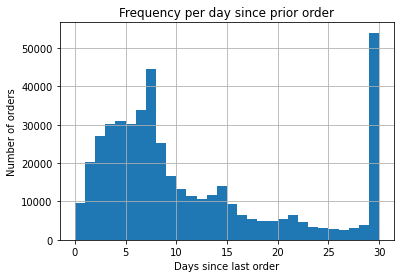

In [11]:
instacart_orders['days_since_prior_order'].hist(bins=30)
plt.title('Frequency per day since prior order')
plt.ylabel('Number of orders')
plt.xlabel('Days since last order')
plt.show()

**Days since Prior Order Observations:**
- Data goes up to 30 days, so assuming 30 = 30 or more days 
- Notice local peaks at 7, 14, 21 days

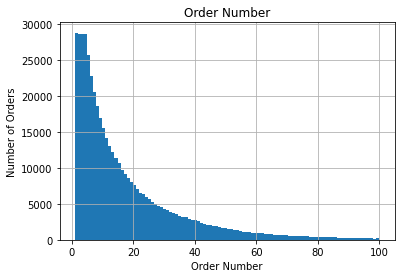

In [12]:
instacart_orders['order_number'].hist(bins=100)
plt.title('Order Number')
plt.ylabel('Number of Orders')
plt.xlabel('Order Number')
plt.show()

**Order Number Observations:**
- Distribution looks as expected, platform in growth phase and heavily tilted towards new users 
- Assuming 100 means 100 or more since the data drops off after that 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [13]:
# Check for duplicated orders
print("Number of duplicated rows in instacart_orders:", instacart_orders.duplicated().sum())
print()
display(instacart_orders[instacart_orders.duplicated()])

Number of duplicated rows in instacart_orders: 15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [14]:
# Check for all orders placed Wednesday at 2:00 AM
query_string = 'order_dow == 3 and order_hour_of_day == 2'
instacart_orders.query(query_string).sort_values(by='order_id')

# We can see some clear duplicates here that have the same data across all columns

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
316583,272079,121263,7,3,2,3.0
210068,284770,137352,7,3,2,8.0
359625,332561,201301,1,3,2,NaN
195093,350018,142887,6,3,2,1.0
29129,353088,46038,4,3,2,11.0


In [15]:
# Remove duplicate orders
instacart_orders = instacart_orders.drop_duplicates()

In [16]:
# Double check for duplicate rows
print("Number of duplicated rows in instacart_orders:", instacart_orders.duplicated().sum())
instacart_orders[instacart_orders.duplicated()]

Number of duplicated rows in instacart_orders: 0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [17]:
# Double check for duplicate order IDs only
print(instacart_orders['order_id'].duplicated().sum())

0


- First I checked for obvious dupicates (all columns duplicated) and removed those
- All of the duplocates occured on Wednesday (order_dow = 3) at 2am, so it was probably an isolated system error as opposed to something wrong witht the larger dataset
- Next I checked for duplicates in just the order_ids column (there should only be one of each order_id), and didn't find anny
- Theother rows can have duplicates since they represent recurring values (multiple people order at same time, day, frequency)
- Users can have multiple orders so I expect to see recurring user_ids

#### What to do with the Null values in `instacart_orders`?

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64



array([[<AxesSubplot:title={'center':'order_number'}>,
        <AxesSubplot:title={'center':'order_dow'}>],
       [<AxesSubplot:title={'center':'order_hour_of_day'}>,
        <AxesSubplot:>]], dtype=object)

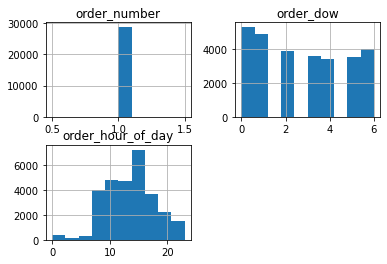

In [18]:
print(instacart_orders.isna().sum()) 
print()
# 28K / 450K is about 6% of the data. Not sure why it's null but OK to ignore 

# But before doing so - Are there any patterns for order_dow, order_number, order_hour_of_day for these nulls?
# Show frequency distribution through hist()
# Nothing out of ordinary except all of the nulls have order_number = 1

null_priors = instacart_orders[instacart_orders['days_since_prior_order'].isna()]
null_priors[['order_number','order_dow','order_hour_of_day']].hist()

# Hide these tables below, were used to check for details the histogram missed

# all of the nulls are 1, if this is first time it should be 0
#print(null_priors.groupby('order_number').count()['order_id']) 
#print()
#print(null_priors.groupby('order_dow').count()['order_id'])
#print()
#print(null_priors.groupby('order_hour_of_day').count()['order_id'])

In [19]:
# What days_since_prior_order do all of the other order_number = 1 have?
instacart_orders[
    (instacart_orders['order_number'] == 1) & 
    (~instacart_orders['days_since_prior_order'].isna())
]['days_since_prior_order']

# Are all of the order_number = 1 null? Are there only 28K rows where order_number = 1? 
    # Yes, almost exact match 28.8K (2 off for some reason?)
print(instacart_orders[instacart_orders['order_number'] == 1].count())

# How about searching for order_number distribution for all the ones where days_since_prior_order = 0?
    # Looks like it's spread out, but 1 is missing so it's probably an entry error 
    # for other order_numbers, probably people ordering 2+ x on same day

zero_prior = instacart_orders[instacart_orders['days_since_prior_order'] == 0].groupby('order_number').count()['order_id']
print(zero_prior)
# zero_prior.plot(kind='bar',x='order_number')

order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64
order_number
2      416
3      390
4      435
5      336
6      358
7      316
8      303
9      302
10     253
11     260
12     224
13     218
14     194
15     185
16     167
17     183
18     164
19     173
20     155
21     146
22     142
23     115
24     146
25     131
26     125
27     119
28     103
29     126
30     129
31      85
32     109
33      97
34     105
35     115
36      80
37      85
38      84
39      94
40      72
41      86
42      80
43      70
44      72
45      79
46      72
47      82
48      71
49      68
50      56
51      68
52      56
53      66
54      54
55      50
56      39
57      45
58      50
59      47
60      41
61      40
62      61
63      44
64      46
65      40
66      48
67      37
68      40
69      29
70      30
71      21
72      25
7

In [20]:
# Set all days_since_prior_order to 0. Can do this multiple ways:
    # set days_since_prior_order = 0 for all rows where order_number = 1. This is better for edge cases
    # just fill in all the nulls with 0 
# Going with latter for simplicity since all order_numer = 1 have days_since_prior_order of null

# instacart_orders['days_since_prior_order'].fillna(0, inplace=True)
# print("Number of Missing Values:", instacart_orders['days_since_prior_order'].isna().sum()) 

In [21]:
# Transform the days_since_prior_order column to integer
# instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].astype(int)
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In this section above:
- identified and removed the obvious duplicates in instacart_orders (all values duplicated)
- checked for less obvious duplicates (some data duplicated but not all)
- Figured out the nulls in days_since_prior_order were all associated with order_number = 1, and there were no other instances where days_since_prior_order = 0, so the nulls were likely the result of an error that occurs on 1st orders
    - Since all of them are 1st time users, it makes sense for this to be null 
    - Originally I replaced the nulls with 0, but 0 can represent a 2nd order on the same day so leaving it Nan works better

### `products` data frame

In [22]:
# Check for fully duplicate rows
# meaning rows where every column value is the same 
print("Number of duplicated rows in products:", products.duplicated().sum())

Number of duplicated rows in products: 0


In [23]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


In [24]:
# Check for just duplicate product names (convert names to lowercase to compare better)
lower_products = products['product_name'].str.lower()

print("Number of duplicated product_names:",lower_products.duplicated().sum())
print()
sorted(products[lower_products.duplicated()]['product_name'].str.lower())

# Very obvious amount of dupicate product_name errors with string 'nan'

Number of duplicated product_names: 1361



['18-in-1 hemp peppermint pure-castile soap',
 'aged balsamic vinegar of modena',
 'albacore solid white tuna in water',
 'american cheese slices',
 'anchovy fillets in olive oil',
 'apricot energy bar',
 'bag of oranges',
 'bag of organic lemons',
 'balsamic vinegar of modena',
 'bbq sauce',
 'beef chili with beans',
 'beef ravioli in tomato & meat sauce',
 'biotin 1000 mcg',
 'blanc de noirs',
 'bleu cheese salad dressing and dip',
 'burrito- steak & cheese',
 'candy bar',
 'carrot and celery sticks',
 'cauliflower head',
 'chicken in a biskit baked snack crackers',
 'chicken with rice soup',
 'chili with beans',
 'chipotle peppers in adobo sauce',
 'chopped garlic in water',
 'chunk light tuna in vegetable oil',
 'chunk light tuna in water',
 'cinnamon rolls with icing',
 'coconut juice with pulp',
 'concentrace trace mineral drops',
 "cookies 'n cream ice cream",
 'cosmic brownies with chocolate chip candy',
 'cream of celery condensed soup',
 'cream of mushroom soup',
 'cream of t

In [25]:
#Added by reviewer

products[products['product_name'].str.lower().duplicated(keep=False)].sort_values(by='product_name')

,product_id,product_name,aisle_id,department_id
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11
19941,19942,Aged Balsamic Vinegar Of Modena,19,13
13152,13153,Aged Balsamic Vinegar of Modena,19,13
22582,22583,Albacore Solid White Tuna In Water,95,15
...,...,...,...,...
17627,17628,nan,100,21
17560,17561,nan,100,21
17549,17550,nan,100,21
25277,25278,nan,100,21


In [26]:
# Check for duplicate product names that aren't missing
non_nan_products = products[products['product_name'] != 'nan']['product_name'].str.lower()
non_nan_products_dupes = non_nan_products[non_nan_products.duplicated()]

print("Non-Nan product name duplicates:", non_nan_products.duplicated().sum())
print()
sorted(non_nan_products_dupes)

Non-Nan product name duplicates: 104



['18-in-1 hemp peppermint pure-castile soap',
 'aged balsamic vinegar of modena',
 'albacore solid white tuna in water',
 'american cheese slices',
 'anchovy fillets in olive oil',
 'apricot energy bar',
 'bag of oranges',
 'bag of organic lemons',
 'balsamic vinegar of modena',
 'bbq sauce',
 'beef chili with beans',
 'beef ravioli in tomato & meat sauce',
 'biotin 1000 mcg',
 'blanc de noirs',
 'bleu cheese salad dressing and dip',
 'burrito- steak & cheese',
 'candy bar',
 'carrot and celery sticks',
 'cauliflower head',
 'chicken in a biskit baked snack crackers',
 'chicken with rice soup',
 'chili with beans',
 'chipotle peppers in adobo sauce',
 'chopped garlic in water',
 'chunk light tuna in vegetable oil',
 'chunk light tuna in water',
 'cinnamon rolls with icing',
 'coconut juice with pulp',
 'concentrace trace mineral drops',
 "cookies 'n cream ice cream",
 'cosmic brownies with chocolate chip candy',
 'cream of celery condensed soup',
 'cream of mushroom soup',
 'cream of t

In [27]:
products.query('product_name in @non_nan_products_dupes')

,product_id,product_name,aisle_id,department_id
12820,12821,pumpkin spice,53,16


In [28]:
# Is there a reason for the nans that can be gathered from other tables?
# How much will dropping nan impact data? will need to merge some tables to see 

# Two ways to use merge syntax:
    # df4 = pd.merge(pd.merge(df1,df2,on='Courses'),df3,on='Courses')
    # df5 = df1.merge(df2,on='Courses').merge(df3,on='Courses')

merged_df = products.merge(order_products,
                           on = 'product_id',
                           how = 'left'
                          ).merge(instacart_orders,
                                  on = 'order_id',
                                  how = 'left')

In [29]:
nan_merged = merged_df[merged_df['product_name'] == 'nan']
nan_merged

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2700,38,nan,100,21,2085048.0,5.0,0.0,108554.0,23.0,0.0,13.0,5.0
2701,38,nan,100,21,1528601.0,12.0,0.0,92670.0,9.0,1.0,10.0,21.0
2702,38,nan,100,21,2360582.0,10.0,0.0,11796.0,20.0,0.0,13.0,2.0
6329,72,nan,100,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8306,110,nan,100,21,1179176.0,3.0,1.0,99570.0,70.0,1.0,13.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4534638,49664,nan,100,21,2225130.0,6.0,1.0,180988.0,47.0,1.0,16.0,7.0
4534639,49664,nan,100,21,1028260.0,16.0,0.0,121714.0,99.0,0.0,8.0,5.0
4534640,49664,nan,100,21,2165040.0,10.0,0.0,18186.0,2.0,0.0,17.0,16.0
4534641,49664,nan,100,21,602344.0,9.0,0.0,64700.0,5.0,4.0,11.0,30.0


array([[<AxesSubplot:title={'center':'order_number'}>,
        <AxesSubplot:title={'center':'order_dow'}>],
       [<AxesSubplot:title={'center':'order_hour_of_day'}>,
        <AxesSubplot:title={'center':'days_since_prior_order'}>],
       [<AxesSubplot:title={'center':'add_to_cart_order'}>,
        <AxesSubplot:title={'center':'reordered'}>]], dtype=object)

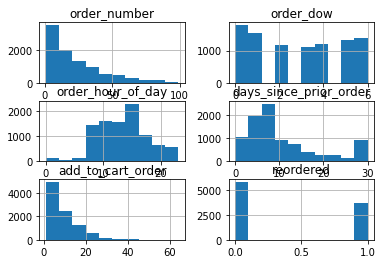

In [30]:
# Taking a quick look to see if there are any obvious patterns
nan_merged[['order_number',
           'order_dow',
           'order_hour_of_day',
           'days_since_prior_order',
           'add_to_cart_order',
           'reordered']].hist()

In [31]:
nan_merged['department_id'].unique()

array([21])

In [32]:
departments.query('department_id == 21')

,department_id,department
20,21,missing


In [33]:
nan_merged['aisle_id'].unique()

array([100])

In [34]:
aisles.query('aisle_id == 100')

,aisle_id,aisle
99,100,missing


In [35]:
# Looks like all the 'nans' have missing data across the board. Let's just drop them? Or Ignore? Change them to 'missing'
# products.drop(products[products['product_name'] == 'nan'], inplace=True)
products['product_name'] = products['product_name'].replace('nan','missing')

In [36]:
products[products['product_name'] == 'missing']

,product_id,product_name,aisle_id,department_id
37,38,missing,100,21
71,72,missing,100,21
109,110,missing,100,21
296,297,missing,100,21
416,417,missing,100,21
...,...,...,...,...
49552,49553,missing,100,21
49574,49575,missing,100,21
49640,49641,missing,100,21
49663,49664,missing,100,21


In the section above:
- checked for duplicates
- found missing data in rows with 'nan' product_name 
- found these rows to match "missing" aisle and departments 

### `departments` data frame

In [37]:
# What is the "missing" department (21)?
department_products =  products.merge(departments,
                                      on='department_id',
                                      how='left')

#display(department_products[department_products['department_id']==21])
# Are all the missing departments unknown product names? Yup. 
department_products[department_products['department_id']==21]['product_name'].value_counts()

missing    1258
Name: product_name, dtype: int64

Department 21 = Missing

### `aisles` data frame

In [38]:
aisles.query('aisle_id == 100')

,aisle_id,aisle
99,100,missing


In [39]:
print("Number of duplicated rows in aisles:", aisles.duplicated().sum())

Number of duplicated rows in aisles: 0


In [40]:
# Just checking to see what is in 'other'
aisles[aisles['aisle'] == 'other']

,aisle_id,aisle
5,6,other


In [41]:
display(products[products['aisle_id'] == 6])

,product_id,product_name,aisle_id,department_id
85,86,Camilia- Single Liquid Doses,6,2
505,506,Arrowroot Powder,6,2
534,535,Rescue Remedy,6,2
675,676,Sunset Blush,6,2
712,713,Pink Moscato California,6,2
...,...,...,...,...
49540,49541,Sweet Echinacea,6,2
49541,49542,Grapefruit Bergamot Foaming Handwash,6,2
49595,49596,Psyllium Husk Powder,6,2
49612,49613,Sirloin Tip Roast,6,2


Aisle 100 = Missing

### `order_products` data frame

In [42]:
# Check for fullly duplicate rows
print("Number of duplicated rows in order_products:", order_products.duplicated().sum())

Number of duplicated rows in order_products: 0


In [43]:
# Double check for any other tricky duplicates

# order_id, product_id, add_to_cart_order, and reordered will naturally have multiples
# but within each order_id, there should be no duplicate add_to_cart_orders

order_products[['order_id','product_id']].duplicated().sum()
# No other duplicates

0

In [44]:
# Just checking which order_ids have multiple items in the orders, and how many
order_products[order_products['order_id'].duplicated()]['order_id'].value_counts()

61355      126
3308010    114
2136777    107
171934     103
1959075     97
          ... 
2362757      1
92078        1
2399639      1
3085192      1
2967099      1
Name: order_id, Length: 428199, dtype: int64

In [45]:
order_products[order_products['order_id']==61355].sort_values(by='product_id',ascending=False)
# Looks like there's some missing add_to_cart_order within some orders

,order_id,product_id,add_to_cart_order,reordered
3965219,61355,49325,NaN,0
2688157,61355,48825,22.0,0
4026844,61355,48104,NaN,0
3205217,61355,47755,7.0,0
2383893,61355,47403,NaN,0
2992377,61355,47269,NaN,0
2897193,61355,47209,1.0,0
2556165,61355,46992,NaN,0
3690865,61355,46402,NaN,0
4256009,61355,46194,38.0,0


In [46]:
# Checking the min and max here to see patterns for add_to_cart_order
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [47]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_products.info()

## Find and remove missing values


### `products` data frame

In [48]:
# Re-running this to pull in changes to 'nan'
merged_df = products.merge(order_products,
                           on = 'product_id',
                           how = 'left'
                          ).merge(instacart_orders,
                                  on = 'order_id',
                                  how = 'left')

In [49]:
# Are all of the missing product names associated with aisle ID 100? - Yes
merged_df.query('aisle_id == 100 and product_name != "missing"')

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [50]:
# Are all of the missing product names associated with department ID 21? - Yes
merged_df.query('department_id == 21 and product_name != "missing"')

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [51]:
# What is this ailse and department? - Missing
print(aisles[aisles['aisle_id'] == 100]['aisle'].unique())
print(departments[departments['department_id'] == 21]['department'].unique())

['missing']
['missing']


In [52]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].replace('missing','unknown')

### `orders` data frame

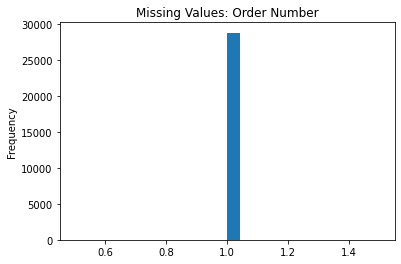

In [53]:
# Are there any missing values where it's not a customer's first order? No, see section 1.1.1 above. 

null_priors['order_number'].plot(kind='hist',
                                 bins=24,
                                 title='Missing Values: Order Number',
                                 ylabel='Quantity of Orders'
                                )
plt.show()

- As shown in section 1.1.1, all of the missing values (for days since prior order) are associated with a users' first order
- Fixed it in 1.1.1 by setting "days since prior order" to 0

### `order_products` data frame

In [54]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [55]:
# What are the min and max values in this column? 1 - 64
print(order_products[['add_to_cart_order','reordered']].describe())
print()
print('minimum add_to_cart_order:',order_products['add_to_cart_order'].min())
print('maximum add_to_cart_order:',order_products['add_to_cart_order'].max())

       add_to_cart_order     reordered
count       4.544171e+06  4.545007e+06
mean        8.351669e+00  5.905025e-01
std         7.080368e+00  4.917411e-01
min         1.000000e+00  0.000000e+00
25%         3.000000e+00  0.000000e+00
50%         6.000000e+00  1.000000e+00
75%         1.100000e+01  1.000000e+00
max         6.400000e+01  1.000000e+00

minimum add_to_cart_order: 1.0
maximum add_to_cart_order: 64.0


In [56]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
missing_values

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [57]:
# Do all orders with missing values have more than 64 products? Yes 

# This will check to see if there are any missing values where the max add_to_cart_order is less than 64 
order_id_counts = order_products[order_products['order_id'].isin(missing_values)]['order_id'].value_counts()
order_id_counts_64 = order_id_counts[order_id_counts <= 64]
order_id_counts_64

# All orders with missing values have more than 64 items as proven above 

Series([], Name: order_id, dtype: int64)

In [58]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info()
order_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.545007e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.533887e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,1.518562e+01,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,9.990000e+02,1.000000e+00


In this section:
- Figured out the add_to_cart_order unknown values are all above 64, meaning any time a customer added > 64 items to the cart there would be a null 
- Replaced the nulls with 999 so that we could transform the column type to integer

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [59]:
# See histogram in EDA section 
# these values make sense, 24 hours in a day, 7 days in a week (0 representing the first value) 
instacart_orders[['order_hour_of_day','order_dow']].describe() 

,order_hour_of_day,order_dow
count,478952.000000,478952.000000
mean,13.447034,2.775051
std,4.224567,2.045901
min,0.000000,0.000000
25%,10.000000,1.000000
50%,13.000000,3.000000
75%,16.000000,5.000000
max,23.000000,6.000000


### [A2] What time of day do people shop for groceries?

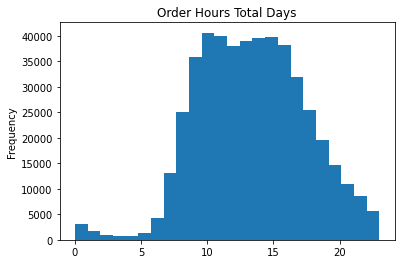

In [60]:
# Looking across the whole week: 
    # Shopping hours coincide with waking / working hours

instacart_orders['order_hour_of_day'].plot(kind='hist',
                                           bins=24,
                                           title='Order Hours Total Days',
                                           ylabel='Quantity of Orders'
                                          )
plt.show()

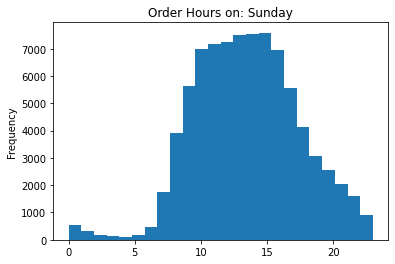

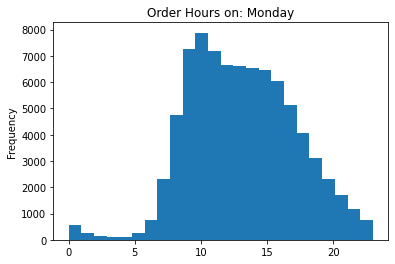

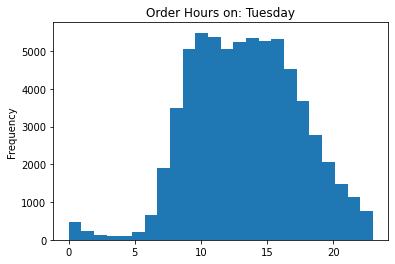

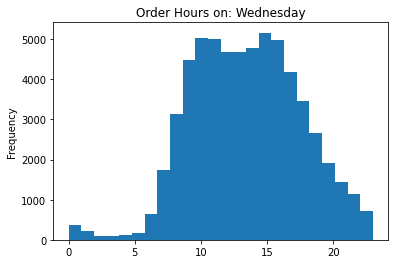

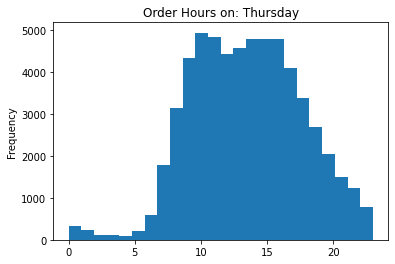

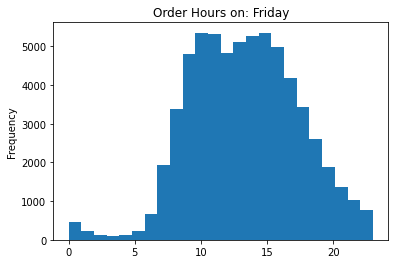

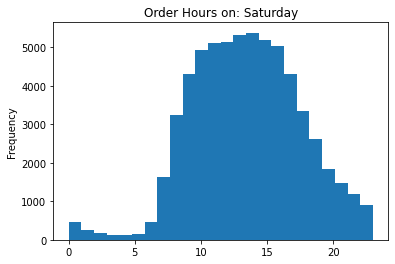

In [61]:
# Looking across each day: 
# Shopping patterns are similar, but there's more volume on Sunday & Monday during waking hours

num_days = instacart_orders['order_dow'].unique()
days_dict = {0: 'Sunday',
             1: 'Monday',
             2: 'Tuesday',
             3: 'Wednesday',
             4: 'Thursday',
             5: 'Friday',
             6: 'Saturday',
            }

for day in sorted(num_days):
    dow_df = instacart_orders[instacart_orders['order_dow']==day]['order_hour_of_day']
    dow_df.plot(kind='hist',bins=24,title='Order Hours on: {}'.format(days_dict[day]),ylabel='Quantity of Orders')
    plt.show()

In [62]:
# Checking quantitative data to see differences
instacart_orders['order_dow'].value_counts()

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

In [63]:
# doing the same for hour of day - most orders are between 10am-4pm
hour_count = instacart_orders['order_hour_of_day'].value_counts()
hour_percent = instacart_orders['order_hour_of_day'].value_counts(normalize = True)
hour_cumsum = instacart_orders['order_hour_of_day'].value_counts(normalize = True).cumsum()

hour_distribution = pd.concat([hour_count,hour_percent,hour_cumsum],axis='columns')
hour_distribution

,order_hour_of_day,order_hour_of_day,order_hour_of_day
10,40578,0.084722,0.084722
11,40032,0.083582,0.168305
15,39789,0.083075,0.251380
14,39631,0.082745,0.334125
13,39007,0.081442,0.415568
16,38112,0.079574,0.495141
12,38034,0.079411,0.574552
9,35896,0.074947,0.649499
17,31930,0.066666,0.716166
18,25510,0.053262,0.769428


Findings:
- People shop most from 10am - 4pm (over half of orders in this 6 hour period)
- 8am and 6pm are inflection points in the orders volume

### [A3] What day of the week do people shop for groceries?

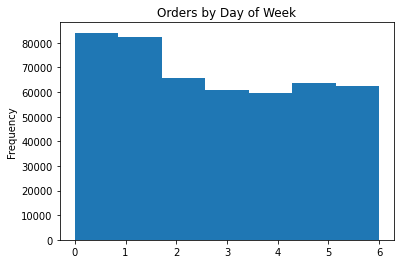

In [64]:
# Looking across the whole week: 
    # Shopping hours coincide with waking / working hours

dow_chart = instacart_orders['order_dow'].plot(kind='hist',
                                               bins=7,
                                               title='Orders by Day of Week',
                                               ylabel='Quantity of Orders'
                                              )

plt.show()

In [65]:
dow_count = instacart_orders['order_dow'].value_counts()
dow_percent = instacart_orders['order_dow'].value_counts(normalize = True)
dow_cumsum = instacart_orders['order_dow'].value_counts(normalize = True).cumsum()

dow_distribution = pd.concat([dow_count,dow_percent,dow_cumsum],axis='columns')
dow_distribution

,order_dow,order_dow,order_dow
0,84090,0.175571,0.175571
1,82185,0.171593,0.347164
2,65833,0.137452,0.484616
5,63488,0.132556,0.617172
6,62649,0.130804,0.747977
3,60897,0.127146,0.875123
4,59810,0.124877,1.000000


People shop most on Sundays and Mondays (these two days have around 17% of total volume each, vs. 12-13% on each of the other 5 days

### [A4] How long do people wait until placing another order?

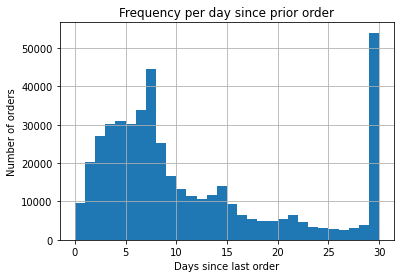

In [66]:
instacart_orders['days_since_prior_order'].hist(bins=30)
plt.title('Frequency per day since prior order')
plt.ylabel('Number of orders')
plt.xlabel('Days since last order')
plt.show()

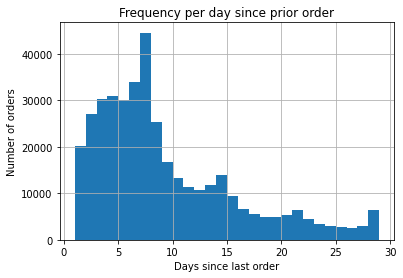

In [67]:
# Ignore 30 since that includes 30 and over? 
# 0 = new users, so is not indicative of true order distribution

instacart_orders[
    (instacart_orders['days_since_prior_order'] > 0) & 
    (instacart_orders['days_since_prior_order'] < 30)
]['days_since_prior_order'].hist(bins=28)
plt.title('Frequency per day since prior order')
plt.ylabel('Number of orders')
plt.xlabel('Days since last order')
plt.show()

# There's a pickup around day 29, so probably some of the actual day 30 is larger than prior dates
# Meaning people order on a monthly timeframe

In [68]:
# Checking the most common days_since_prior_order amount 

days_since_count = instacart_orders['days_since_prior_order'].value_counts()
days_since_percent = instacart_orders['days_since_prior_order'].value_counts(normalize = True)
days_since_cumsum = instacart_orders['days_since_prior_order'].value_counts(normalize = True).cumsum()

days_since_distribution = pd.concat([days_since_count,days_since_percent,days_since_cumsum],axis='columns')
days_since_distribution

# The most frequent order frequencies are distributed around weekly frequencies:
    # 1 week 
    # 2 weeks
    # 3 weeks
    # 28 days / 1 month (don't know how many order at 30 days exact since that value likely includes 30 days+)

,days_since_prior_order,days_since_prior_order,days_since_prior_order
30.0,51337,0.114048,0.114048
7.0,44577,0.099030,0.213078
6.0,33930,0.075377,0.288456
4.0,31006,0.068882,0.357337
3.0,30224,0.067144,0.424482
5.0,30096,0.066860,0.491341
2.0,27138,0.060289,0.551630
8.0,25361,0.056341,0.607971
1.0,20179,0.044829,0.652800
9.0,16753,0.037218,0.690017


In [69]:
# Do the orders that have 30 days_since_prior_order coincide with users who've only ordered once before?
# The idea is that new users take time to increase the frequency of use, so if I've only ordered once I might not order for months
# But each time I order, the time until the next order declines as I get used to using the service 
# This data seems to validate that idea, since the most common order_number for 30 days_since_prior_order is < 6

infrequent_users_ordernum_count = instacart_orders[instacart_orders['days_since_prior_order'] == 30]['order_number'].value_counts()
infrequent_users_ordernum_percent = instacart_orders[instacart_orders['days_since_prior_order'] == 30]['order_number'].value_counts(normalize = True)
infrequent_users_ordernum_cumsum = instacart_orders[instacart_orders['days_since_prior_order'] == 30]['order_number'].value_counts(normalize = True).cumsum()

infrequent_users_ordernum_distribution = pd.concat([infrequent_users_ordernum_count,
                                                    infrequent_users_ordernum_percent,
                                                    infrequent_users_ordernum_cumsum],
                                                   axis='columns')
infrequent_users_ordernum_distribution

,order_number,order_number,order_number
4,6752,0.131523,0.131523
3,6576,0.128095,0.259618
2,6545,0.127491,0.387109
5,5430,0.105772,0.492880
6,4364,0.085007,0.577887
7,3448,0.067164,0.645051
8,2892,0.056334,0.701385
9,2378,0.046321,0.747706
10,1966,0.038296,0.786002
11,1588,0.030933,0.816935


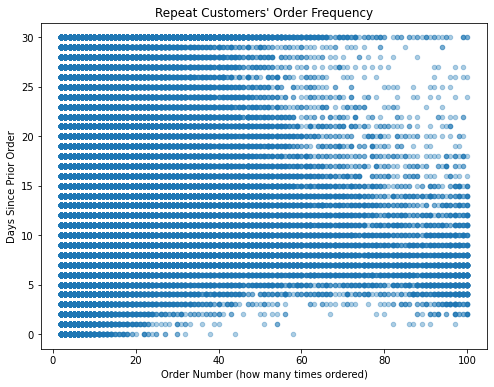

In [70]:
# Can test this out by plotting order_number vs. days_since_prior_order across the whole dataset
# But first we need to isolate the maximum days_since_prior_order and order_number per user_id
# If this hypothesis is right, we should see more dots in the lower order_numbers for higher days_since_prior_orders
# and a larger amount of dots in high order_numbers coinciding with lower days_since_prior_orders
# Also need to keep in mind this is an incomplete dataset

user_grp = instacart_orders.groupby('user_id')
user_grp_max = user_grp.max()

user_grp_max.plot(kind='scatter',
                  x = 'order_number',
                  y = 'days_since_prior_order',
                  title = "Repeat Customers' Order Frequency",
                  alpha = 0.36,
                  figsize = [8,6],
                  xlabel = 'Order Number (how many times ordered)',
                  ylabel = 'Days Since Prior Order'
                 )

plt.show()

# This plot shows there is somewhat of the relationship I described above
# But also a lot of high-frequency (low days_since_prior_order) coinciding with low order_numbers
# meaning a lot of newer users ordering frequently too 

Findings:
- Most users place orders in weekly increments (i.e. either 1 week, 2 weeks, 3 or 4) 
- Or monthly (~30 days, perhaps on the same date each month)
- The data for 30 days likely includes 30 days and more 
- Most of the data falls in between 0-2 weeks with 1 week being by far the most frequent order frequency
- This makes sense as groceries are perishible and if users are consistent users then they'd order recurringly 
- New users to the platform tend to order less frequently than older users on the platform

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

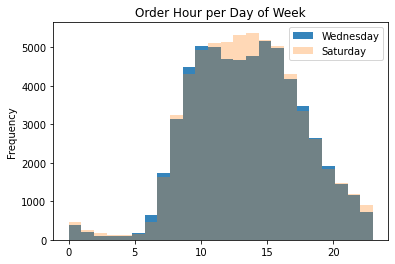

In [71]:
# Checking histograms for order_hour_of_day distribution for each order_dow to see patterns

dow_3 = instacart_orders[instacart_orders['order_dow']==3]['order_hour_of_day']
dow_6 = instacart_orders[instacart_orders['order_dow']==6]['order_hour_of_day']

dow_3.plot(kind='hist',bins=24,alpha=0.9,title='Order Hour per Day of Week',ylabel='Quantity of Orders')
dow_6.plot(kind='hist',bins=24,alpha=0.3)

plt.legend(['Wednesday','Saturday'])
plt.show()

<AxesSubplot:title={'center':'Orders by Hour on Wednesday'}, ylabel='Frequency'>

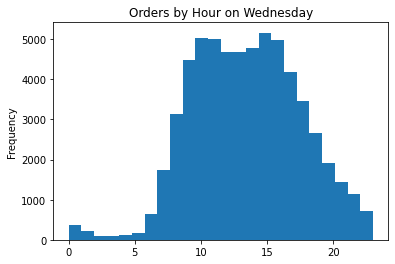

In [72]:
dow_3.plot(kind='hist',bins=24,title='Orders by Hour on Wednesday',ylabel='Quantity of Orders')

<AxesSubplot:title={'center':'Orders by Hour on Saturday'}, ylabel='Frequency'>

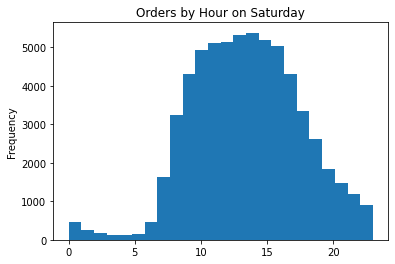

In [73]:
dow_6.plot(kind='hist',bins=24,title='Orders by Hour on Saturday',ylabel='Quantity of Orders')

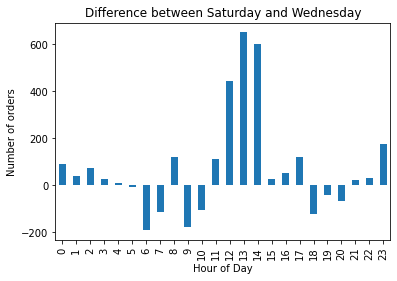

In [74]:
# This chart shows the differences between Saturday and Wednesday 
    # Positive means more orders on Saturday at that hour
    # Negative means more orders on Wednesday at that hour
    
# It looks like on Saturdays there are a lot more orders between noon - 2pm, and generally between 11am-5pm
# There are also some more orders really late at night on weekends (woohoo it's Saturday!)
# On Wednesday there are more orders earlier in the morning and in the evening (right before and after work)

dow_3_6_delta = dow_6.value_counts() - dow_3.value_counts()
dow_3_6_delta.plot(kind='bar')

plt.title('Difference between Saturday and Wednesday')
plt.ylabel('Number of orders')
plt.xlabel('Hour of Day')
plt.show()

In [75]:
# Taking a look at raw numbers
dow_3_6_delta

0      91
1      39
2      71
3      24
4      10
5      -9
6    -192
7    -113
8     121
9    -179
10   -107
11    112
12    444
13    649
14    601
15     25
16     53
17    120
18   -125
19    -42
20    -70
21     23
22     31
23    175
Name: order_hour_of_day, dtype: int64

Findings:
- On Saturdays there are a lot more orders between noon - 2pm, and generally more between 11am-5pm
- There are also some more orders really late at night on weekends (woohoo it's Saturday!)
- On Wednesday there are more orders earlier in the morning and in the evening (right before and after work)

### [B2] What's the distribution for the number of orders per customer?

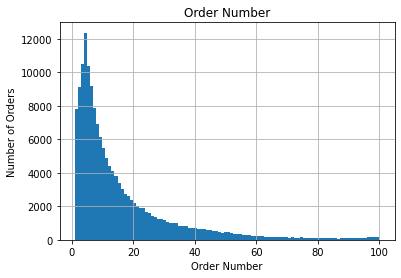

In [76]:
user_grp = instacart_orders.groupby(by='user_id')
order_distribution = user_grp['order_number'].max()
order_distribution.hist(bins=100)
plt.title('Order Number')
plt.ylabel('Number of Orders')
plt.xlabel('Order Number')
plt.show()

In [77]:
order_distribution.value_counts()

orders_count = order_distribution.value_counts()
orders_percent = order_distribution.value_counts(normalize = True)
orders_cumsum = order_distribution.value_counts(normalize = True).cumsum()

orders_distribution = pd.concat([orders_count,orders_percent,orders_cumsum],axis='columns')
orders_distribution

,order_number,order_number,order_number
4,12368,0.078558,0.078558
3,10510,0.066757,0.145315
5,10406,0.066096,0.211412
6,9194,0.058398,0.269810
2,9113,0.057883,0.327693
7,7901,0.050185,0.377878
1,7840,0.049798,0.427676
8,6894,0.043789,0.471465
9,6118,0.038860,0.510325
10,5497,0.034916,0.545240


The most frequent order quentity (total times ordered) is 4, with the majority of users in the dataset having ordered less than 10 times (which makes sense as instacart is a growing platform, more new users than old)

### [B3] What are the top 20 popular products (display their id and name)?

In [78]:
product_quantity = order_products.merge(products, on='product_id', how='left')
product_quantity_table = product_quantity[['product_id','product_name']].value_counts()
product_quantity_table[:20]

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

See the table above. Bananas, fruits, vegetables, and a lot of organic produce. I'm surprised at how healthy it is! 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [79]:
# This one is tricky since there isn't a max add_to_cart_order. 
# BUT whe can just count how many times order_id shows up in order_products since there will be a duplicate for each product ordered.

total_items = order_products['order_id'].value_counts()
total_items.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64

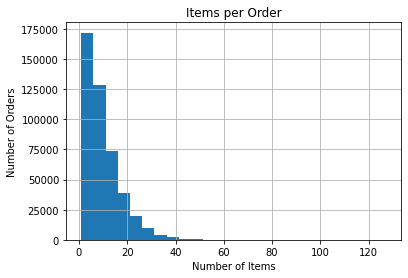

In [80]:
total_items.hist(bins=25)
plt.title('Items per Order')
plt.ylabel('Number of Orders')
plt.xlabel('Number of Items')
plt.show()

In [81]:
total_items_count = total_items.value_counts()
total_items_percent = total_items.value_counts(normalize = True)
total_items_cumsum = total_items.value_counts(normalize = True).cumsum()

total_items_distribution = pd.concat([total_items_count,
                                      total_items_percent,
                                      total_items_cumsum],
                                     axis='columns')

total_items_distribution

,order_id,order_id,order_id
5,31923,0.070933,0.070933
6,31698,0.070433,0.141366
4,31054,0.069002,0.210367
7,30822,0.068486,0.278854
3,29046,0.064540,0.343394
8,28539,0.063414,0.406807
2,26292,0.058421,0.465228
9,25742,0.057199,0.522427
10,23248,0.051657,0.574084
1,21847,0.048544,0.622627


Findings:
- Most users order less than 10 items (57%)
- 90% of users order less than 20 items
- 95% of users order less than 25 items
- The distribution takes the shape of an exponentially decreasing curve

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [82]:
# Taking the same table from before, but only for reordered products
reordered_products = order_products[order_products['reordered']==1]
reordered_products_quantity = reordered_products.merge(products, on='product_id', how='left')
reordered_products_quantity_table = reordered_products_quantity[['product_id','product_name']].value_counts()
# reordered_products_quantity_table = reordered_products_quantity['product_name'].value_counts()
reordered_products_quantity_table[:20]

# Very similar to the top 20. Let's merge them and compare

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

In [83]:
product_quantity_table = product_quantity_table.to_frame('top_items')
reordered_products_quantity_table = reordered_products_quantity_table.to_frame('top_reorder')

In [84]:
# Comparing iteams in top 20 in general vs. top 20 re-ordered

order_reorder_delta = product_quantity_table.merge(reordered_products_quantity_table, on='product_name')
order_reorder_delta['re_delta'] = order_reorder_delta['top_items'] - order_reorder_delta['top_reorder']
order_reorder_delta['pct_re_delta'] = order_reorder_delta['re_delta'] / order_reorder_delta['top_items']
order_reorder_delta['pct_reorder'] = order_reorder_delta['top_reorder'] / order_reorder_delta['top_items']
order_reorder_delta[:20]

# Top items are very similar, with those further down the list diverging more in the re-order list (less)
# Items further down the list may be more infrequent purchases vs. items put on recurring

,top_items,top_reorder,re_delta,pct_re_delta,pct_reorder
product_name,,,,,
Banana,66050,55763,10287,0.155746,0.844254
Bag of Organic Bananas,53297,44450,8847,0.165994,0.834006
Organic Strawberries,37039,28639,8400,0.226788,0.773212
Organic Baby Spinach,33971,26233,7738,0.227783,0.772217
Organic Hass Avocado,29773,23629,6144,0.206361,0.793639
Organic Avocado,24689,18743,5946,0.240836,0.759164
Large Lemon,21495,15044,6451,0.300116,0.699884
Strawberries,20018,13945,6073,0.303377,0.696623
Limes,19690,13327,6363,0.323159,0.676841


See the list above. Findings:
- Very similar to the top 20
- Top items are very similar, with those further down the list diverging more in the re-order list (less)
- Items further down the list may be more infrequent purchases vs. items put on recurring

### [C3] For each product, what proportion of its orders are reorders?

In [85]:
# We can take what we just did with pct_delta and flip the percentage equation. I added it in the cell above for ease
order_reorder_delta[:20]['pct_reorder']

product_name
Banana                      0.844254
Bag of Organic Bananas      0.834006
Organic Strawberries        0.773212
Organic Baby Spinach        0.772217
Organic Hass Avocado        0.793639
Organic Avocado             0.759164
Large Lemon                 0.699884
Strawberries                0.696623
Limes                       0.676841
Organic Whole Milk          0.829133
Organic Raspberries         0.768245
Organic Yellow Onion        0.701032
Organic Garlic              0.680813
Organic Zucchini            0.690894
Organic Blueberries         0.633979
Cucumber Kirby              0.697477
Organic Fuji Apple          0.716598
Organic Lemon               0.687704
Apple Honeycrisp Organic    0.736763
Organic Grape Tomatoes      0.661489
Name: pct_reorder, dtype: float64

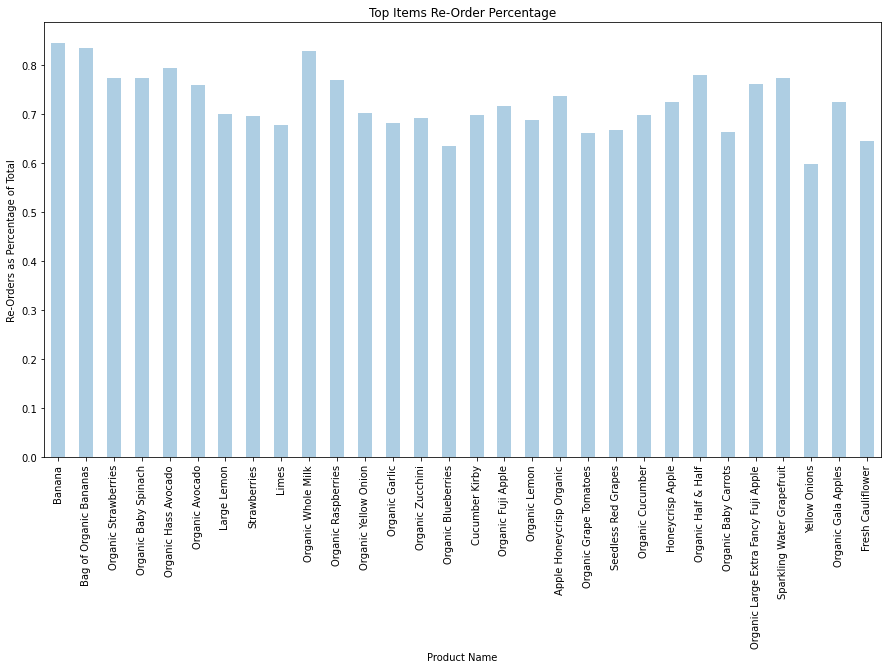

In [86]:
order_reorder_delta[:30]['pct_reorder'].plot(kind='bar',
                                             title = "Top Items Re-Order Percentage",
                                             alpha = 0.36,
                                             figsize = [15,8],
                                             xlabel = 'Product Name',
                                             ylabel = 'Re-Orders as Percentage of Total'                                             
                                            )
plt.show()

In [87]:
order_reorder_delta.describe()
# Why is the meximum for pct_reorder 571? It should be 1. Going back to check. 

,top_items,top_reorder,re_delta,pct_re_delta,pct_reorder
count,523400.000000,523400.000000,523400.000000,523400.000000,523400.000000
mean,17.888093,11.974820,5.913273,-2.433412,3.433412
std,212.478072,158.606378,76.506565,17.376660,17.376660
min,1.000000,1.000000,-570.000000,-570.000000,0.000851
25%,1.000000,1.000000,-1.000000,-1.000000,0.333333
50%,3.000000,2.000000,0.000000,0.000000,1.000000
75%,7.000000,5.000000,4.000000,0.666667,2.000000
max,66050.000000,55763.000000,10287.000000,0.999149,571.000000


In [88]:
discrepancy = order_reorder_delta[order_reorder_delta['top_reorder'] > order_reorder_delta['top_items']]
discrepancy = discrepancy.reset_index()
discrepancy

,product_name,top_items,top_reorder,re_delta,pct_re_delta,pct_reorder
0,unknown,267,571,-304,-1.138577,2.138577
1,unknown,228,571,-343,-1.504386,2.504386
2,unknown,205,571,-366,-1.785366,2.785366
3,unknown,197,571,-374,-1.898477,2.898477
4,unknown,195,571,-376,-1.928205,2.928205
...,...,...,...,...,...,...
172658,unknown,1,2,-1,-1.000000,2.000000
172659,unknown,1,2,-1,-1.000000,2.000000
172660,unknown,1,2,-1,-1.000000,2.000000
172661,unknown,1,2,-1,-1.000000,2.000000


In [89]:
discrepancy['product_name'].unique()
# Looks like they are unknowns 
# Can either exclude unknowns from the tables above or just ignore

array(['unknown'], dtype=object)

In [90]:
# Resetting index just to check 
order_reorder_delta_reset = order_reorder_delta.reset_index()
order_reorder_delta_reset = order_reorder_delta.query("product_name != 'unknown'")
order_reorder_delta_reset.describe()
# Great works now 

,top_items,top_reorder,re_delta,pct_re_delta,pct_reorder
count,35720.000000,35720.000000,35720.000000,35720.000000,35720.000000
mean,126.336842,75.030823,51.306019,0.513650,0.486350
std,788.982964,594.176669,214.062352,0.210583,0.210583
min,1.000000,1.000000,0.000000,0.000000,0.010989
25%,6.000000,2.000000,3.000000,0.383681,0.333333
50%,18.000000,7.000000,10.000000,0.500000,0.500000
75%,62.000000,29.000000,32.000000,0.666667,0.616319
max,66050.000000,55763.000000,10287.000000,0.989011,1.000000


Findings:
- Looks like it's pretty consistent, the top items have around 60-80% of total as re-orders
- For all products, it's on average around half

### [C4] For each customer, what proportion of their products ordered are reorders?

In [91]:
# We will need to get total products ordered per user_id, and then the % of that which has reordered = 1
# Need to merge with instacart_orders

user_products = order_products.merge(instacart_orders[['user_id','order_id']],
                                     on='order_id',
                                     how='left'
                                    )
user_products

,order_id,product_id,add_to_cart_order,reordered,user_id
0,2141543,11440,17,0,58454
1,567889,1560,1,1,129474
2,2261212,26683,1,1,47476
3,491251,8670,35,1,134505
4,2571142,1940,5,1,155995
...,...,...,...,...,...
4545002,577211,15290,12,1,76414
4545003,1219554,21914,9,0,163902
4545004,692640,47766,4,1,597
4545005,319435,691,8,1,7124


In [92]:
user_product_grp = user_products.groupby('user_id')
user_products = user_product_grp['product_id'].count()
user_reordered = user_product_grp['reordered'].sum()

In [93]:
user_products = user_products.to_frame('total_products')
user_reordered = user_reordered.to_frame('total_reordered')
user_table = user_products.merge(user_reordered, on = 'user_id')

In [94]:
user_table['pct_reorder'] = user_table['total_reordered'] / user_table['total_products']
user_table

,total_products,total_reordered,pct_reorder
user_id,,,
2,26,1,0.038462
4,2,0,0.000000
5,12,8,0.666667
6,4,0,0.000000
7,14,13,0.928571
...,...,...,...
206203,27,6,0.222222
206206,21,15,0.714286
206207,46,41,0.891304


In [95]:
user_table.describe()

,total_products,total_reordered,pct_reorder
count,149626.000000,149626.000000,149626.000000
mean,30.375784,17.936976,0.494853
std,35.873511,27.793625,0.292685
min,1.000000,0.000000,0.000000
25%,9.000000,2.000000,0.272727
50%,18.000000,8.000000,0.500000
75%,38.000000,21.000000,0.724138
max,580.000000,477.000000,1.000000


- About half of user's orders are reorders, on average. 
- See user_table for a table of reorder percentage per user

### [C5] What are the top 20 items that people put in their carts first? 

In [96]:
# Run the same tables but for add_to_cart_order = 1 

first_products = order_products[order_products['add_to_cart_order']==1]
first_products_quantity = first_products.merge(products, on='product_id', how='left')
first_products_quantity_table = first_products_quantity[['product_id','product_name']].value_counts()
first_products_quantity_table[:20]

# Similar items but very different amounts. Let's merge and compare

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

In [97]:
first_products_quantity_table = first_products_quantity_table.to_frame('first_item')
first_products_quantity_table.head()

,,first_item
product_id,product_name,
24852,Banana,15562
13176,Bag of Organic Bananas,11026
27845,Organic Whole Milk,4363
21137,Organic Strawberries,3946
47209,Organic Hass Avocado,3390


In [ ]:
first_order_reorder_delta = first_products_quantity_table.merge(order_reorder_delta, 
                                                                left_on='product_name',
                                                                right_on='product_name',
                                                                how='left')

In [ ]:
first_order_reorder_delta['first_delta'] = first_order_reorder_delta['top_items'] - first_order_reorder_delta['first_item']
first_order_reorder_delta['pct_first'] = first_order_reorder_delta['first_item'] / first_order_reorder_delta['top_items']
first_order_reorder_delta[:20]

In [ ]:
first_order_reorder_delta[:30]['pct_first'].plot(kind='bar',
                                                 title = "Top First Items Added Percentage",
                                                 alpha = 0.36,
                                                 figsize = [15,8],
                                                 x = 'product_name',
                                                 xlabel = 'Product Name',
                                                 ylabel = 'First Adds as Percentage of Total'                                             
                                            )
plt.ylim([0,1])
plt.show()

Findings:
- The top 20 items has some overlap with the top items and top re-ordered
- Makes up a lot less of the total % than re-ordered items (makes sense since it's a narrower criteria, more likely to be re-ordered than to be first in the cart) 
- No discernable pattern 

# Key Takeaways:
**Order Frequency:**
- Order frequency is a step change level higher on Sundays & Mondays
- Most orders occur during waking hours, especially between 10am - 4pm across all days
- The increase in volume on Sundays and Mondays is weighted in this 10am - 4pm time period 
- Instacart should ensure the website, shoppers, and stores can handle increased traffic during this period

**Top Items:**
- The top items are also the top recurring items, and amongst the top items shoppers put in their cart first
- These items should always be in stock, and we can predict quantity fairly well since they are mostly recurring purchases
- Most of the top items are perishibles and require choosing (fruits and vegetables), perhaps this is something users really don't want to spend time doing 

**Platform Growth:**
- The instacart platform is still in a growth phase, as can be seen by the distribution of users' order numbers
- Most users reorder around a weekly timeframe (<14 days) 
- Instacart should focus on the conversion of new users to recurring users:
    - Perhaps can offer new users a discount if they set recurring orders 
    
**Data Issues to Fix:**
- Orders with more than 64 items stop tracking the add-to-cart-order after item 64
- Different product_ids have the same name, these should be combined 
- Missing product names should be entered as "missing" instead of a string "nan"
- There was a glitch that occured on Wednesday at 2am, team should check that this isn't a recurring problem